In [3]:
!pip install geovoronoi
!pip install descartes
import sys
sys.path.insert(0,'src/')#change this to your path
from facilityAnalysis import *
from linearRegression import * 
from facility_ABM import *
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [4]:
clinic_df = pd.read_csv("data/abortion_data.csv")

"""
LOAD AND CLEAN POPULATION INFORMATION
"""
#create population county data frame
COUNTY_SHP_FILE = 'data/UScounties/'
COUNTY_POP_FILE = 'data/historical_county_populations.csv'
EPSG=4326

#create a dataframe with population information for each county
df_merged = make_county_pop_df(COUNTY_SHP_FILE,COUNTY_POP_FILE,EPSG)
#get the boundary of the US
boundary_shape = make_boundary(df_merged,EPSG)



In [5]:
df_pop = pd.read_csv("data/simulated_pop_points.csv")
gdf_pop = gpd.GeoDataFrame(df_pop,geometry = gpd.points_from_xy(df_pop.lon,df_pop.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement
df_state = df_merged.dissolve("state").reset_index().loc[:,['state','geometry']]

In [6]:
lat_col = 'latitude'#CHANGE TO THE NAME OF THE LAT COL IN YOUR DF
lon_col = "longitude"#CHANGE TO THE NAME OF THE LON COL IN YOUR DF
clinic_df = pd.read_csv('data/abortion_data.csv')
clinic_geo_df = create_facility_geo_df(clinic_df,boundary_shape,lat_col=lat_col,lon_col=lon_col).set_crs(4326)
clinic_geo_df = clinic_geo_df.reset_index()

creating facility points from lat lon pairs...
initializing GeoDataFrame...
filtering locations within boundaries


In [7]:
clinic_geo_df

,index,facility ID,facility name,Unnamed: 2,telehealth clinic only,full address,street address,city,state,zip code,...,MAB gestational limit in 2021,median state cost for medication abortion in 2021,provided procedural abortion in 2021,procedural abortion gestational limit in 2021,median state cost for first trimester procedural abortion in 2021,median state cost for second trimester procedural abortion in 2021,date facility opened,facility closure date/info,date of last facility update,geometry
0,0,1,A Affordable Women's Medical Center,NaN,NaN,"7007 N. Freeway, Ste. 225, Houston, TX 77076","7007 N. Freeway, Ste. 225",Houston,TX,77076.0,...,NaN,650.0,NaN,NaN,715,850.0,NaN,2014,12/29/21,POINT (-95.38910 29.85560)
1,1,2,A Capital Women's Health Clinic,NaN,NaN,"1511 Starling Drive, Richmond, VA 23229",1511 Starling Drive,Richmond,VA,23229.0,...,11.0,433.0,Yes,13.6,450,850.0,NaN,NaN,12/21/21 (phone),POINT (-77.56860 37.60520)
2,2,3,A Caring Choice for Women,NaN,NaN,NaN,NaN,Parker,CO,80134.0,...,NaN,458.0,NaN,NaN,747,2100.0,NaN,NaN,7/14/21,POINT (-104.79700 39.51260)
3,3,4,A Choice For Women,NaN,NaN,"16601 NE 19th Ave, North Miami Beach, FL 33162",16601 NE 19th Ave,North Miami Beach,FL,33162.0,...,9.0,543.0,Yes,20.0,550,650.0,NaN,NaN,12/20/21,POINT (-80.16200 25.92880)
4,4,5,A GYN Diagnostic Center,NaN,NaN,"375 E. 49th St. Suite #2, Hialeah, FL 33013",375 E. 49th St. Suite #2,Hialeah,FL,33013.0,...,8.0,543.0,Yes,22.0,550,650.0,NaN,NaN,12/20/21,POINT (-80.27520 25.86730)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1098,1218,Professional Gynecological Services: Canarsie,NaN,NaN,NaN,5321 Flatlands Avenue,Brooklyn,NY,11234.0,...,NaN,580.0,No,NaN,580,600.0,NaN,NaN,12/29/21,POINT (-73.92420 40.62850)
1066,1100,1220,Professional Gynecological Services: Staten Is...,NaN,NaN,NaN,1478 Victory Blvd,Staten Island,NY,10301.0,...,6.5,580.0,No,NaN,580,600.0,NaN,NaN,12/28/21,POINT (-74.11270 40.61380)
1067,1101,1221,WMU School of Medicine Clinics,NaN,NaN,NaN,1000 Oakland Dr,Kalamazoo,MI,49008.0,...,6.0,550.0,No,NaN,550,675.0,NaN,NaN,12/29/21,POINT (-85.59910 42.28250)
1068,1102,1222,"Women Center L.A., Gynecologist Services in Lo...",NaN,NaN,NaN,5901 W. Olympic Blvd. Ste. 503,Los Angeles,CA,90036.0,...,7.0,700.0,Yes,12.0,750,926.0,NaN,NaN,10/04/2021 (phone),POINT (-118.36000 34.05760)


## Real World Objective Functions

In [8]:
#abortion_nearest_facility = calc_facility_distance(gdf_pop,clinic_geo_df)
pop_with_facility_info = calc_facility_distance(gdf_pop,clinic_geo_df)

#pop_with_facilty_info = gpd.sjoin(abortion_nearest_facility.set_geometry("nearest_fac"),clinic_geo_df.set_crs(4326)).set_geometry('geometry')

In [9]:
objective_function = objective_function(pop_with_facility_info,value_col='distance',groupby_col='nearest_fac')

In [31]:
objective_function

1526133892.0279312

In [10]:
objective_function/1070

1426293.3570354497

In [11]:
pop_row = gdf_pop.iloc[0]

nearest_fac = nearest(pop_row,df2=clinic_geo_df)


pop_row.geometry.distance(nearest_fac)

1.2735363980015333

<AxesSubplot:>

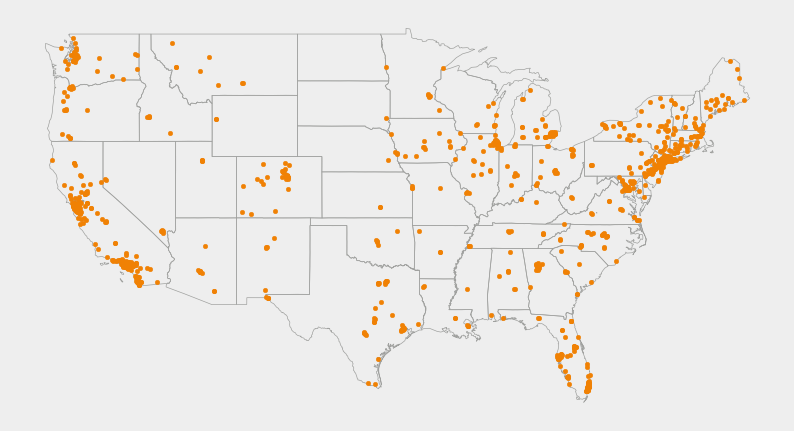

In [12]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat')

<AxesSubplot:>

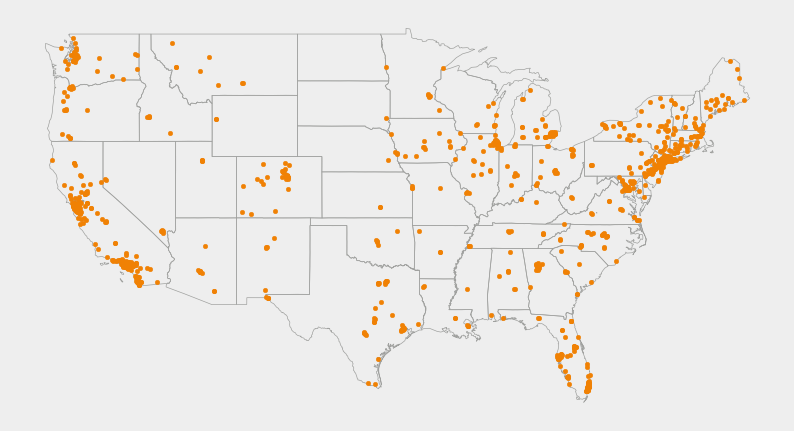

In [13]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)


<AxesSubplot:>

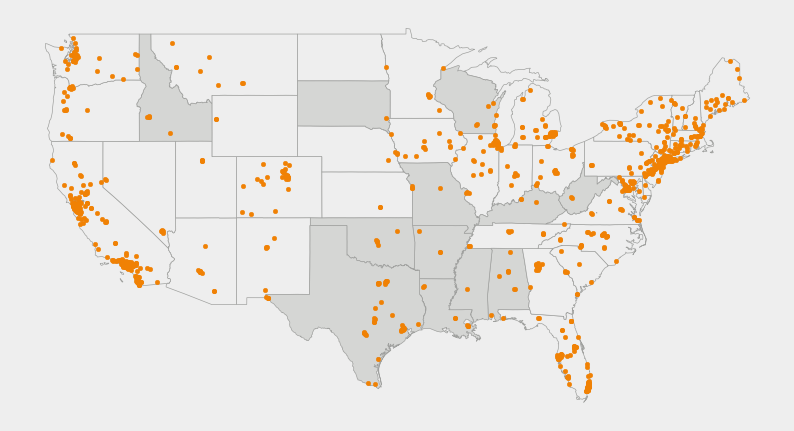

In [14]:

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)


<AxesSubplot:>

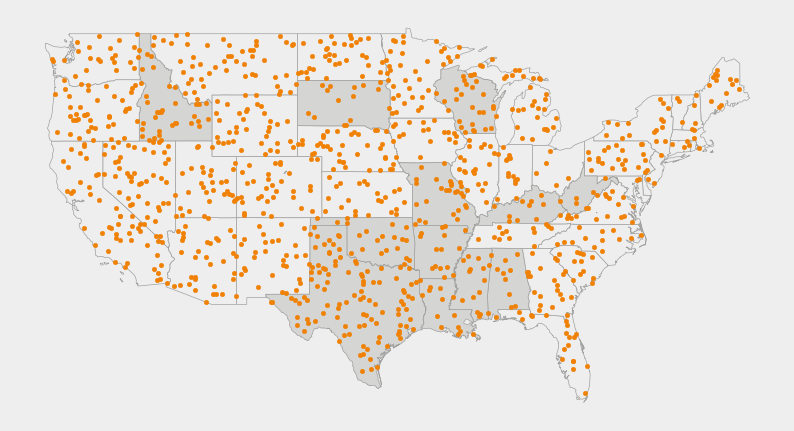

In [15]:
sim10df = gpd.read_parquet('all_10steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

<AxesSubplot:>

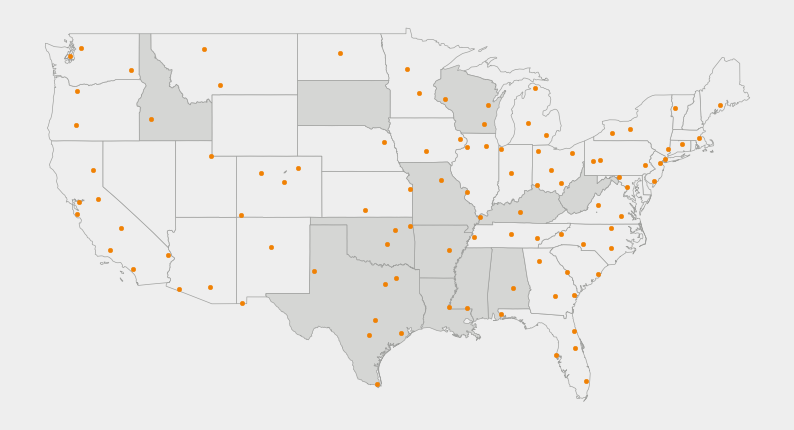

In [16]:
sim1000df = gpd.read_parquet('all_1000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

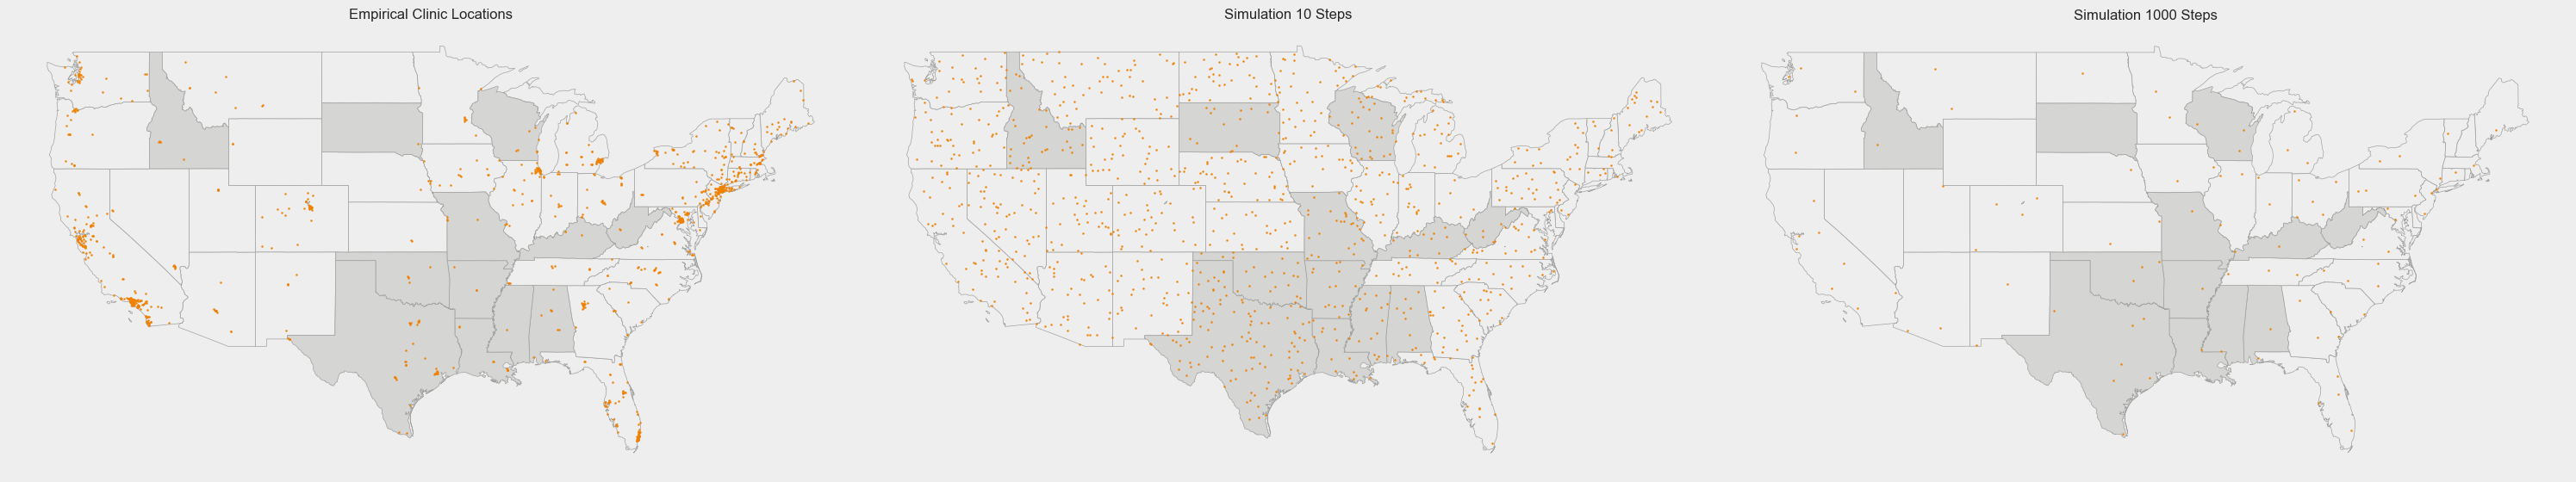

In [30]:
fig,axes = plt.subplots(ncols = 3,figsize = (30,10))

ax = axes[0]
ax.set(title = "Empirical Clinic Locations")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)

ax = axes[1]
ax.set(title = "Simulation 10 Steps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)


ax = axes[2]
ax.set(title = "Simulation 1000 Steps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)
plt.tight_layout()
plt.savefig('plots/simulation_facility_loc.png',dpi=300)

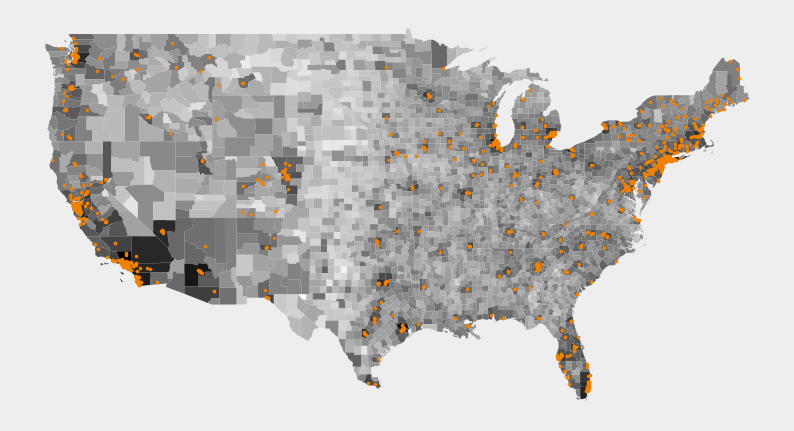

In [29]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged.plot(column = 'log_pop',ax = ax)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.png")


In [19]:
vote_df = pd.read_csv("data/countypres_2000-2020.csv")

In [20]:
vote_df = vote_df.query("year == 2020")
vote_df.to_csv("data/countypres-2020.csv")

Precint Data

In [21]:
vote_df = pd.read_csv("data/countypres_2000-2020.csv")
vote_df = vote_df.query('year == 2020')
vote_df['party_detailed'] = vote_df['party']
vote_df['party_simplified'] = vote_df['party']
vote_df = vote_df.dropna(subset = ['party_simplified','county_fips'])
vote_df['county_fips'] = vote_df.county_fips.astype(int)


vote_df[vote_df['party_detailed'].str.contains("DEMOCRAT")]

#['party_simplified'] = 'DEMOCRAT'

vote_df['is_dem'] = vote_df['party_detailed'].str.contains("DEMOCRAT")
vote_df.loc[ vote_df['party_detailed'].str.contains("DEMOCRAT"),'party_simplified'] = 'DEMOCRAT'

vote_df = vote_df[vote_df.party_simplified.isin(['DEMOCRAT','REPUBLICAN'])]

votes_df_votes = vote_df.groupby(['county_fips','party_simplified','state']).agg(total_votes = ('candidatevotes',sum)).reset_index()

In [22]:
df_votes_pivot = votes_df_votes.reset_index().pivot(index = 'county_fips',values = 'total_votes',columns = 'party_simplified')
df_votes_pivot = df_votes_pivot[['DEMOCRAT','REPUBLICAN']]
df_votes_pivot['DEM_LEAD'] = df_votes_pivot['DEMOCRAT'] - df_votes_pivot['REPUBLICAN']
df_votes_pivot['VOTES_TOTAL'] = df_votes_pivot['DEMOCRAT'] + df_votes_pivot['REPUBLICAN']
df_votes_pivot['DEM_LEAD_NORM'] = df_votes_pivot['DEM_LEAD']/df_votes_pivot['VOTES_TOTAL']
df_dem_lead = df_votes_pivot['DEM_LEAD_NORM'].reset_index()

In [23]:
votes_df_votes.query("state == 'CALIFORNIA'")

,county_fips,party_simplified,state,total_votes
396,6001,DEMOCRAT,CALIFORNIA,617659
397,6001,REPUBLICAN,CALIFORNIA,136309
398,6003,DEMOCRAT,CALIFORNIA,476
399,6003,REPUBLICAN,CALIFORNIA,244
400,6005,DEMOCRAT,CALIFORNIA,8153
...,...,...,...,...
507,6111,REPUBLICAN,CALIFORNIA,162207
508,6113,DEMOCRAT,CALIFORNIA,67598
509,6113,REPUBLICAN,CALIFORNIA,27292
510,6115,DEMOCRAT,CALIFORNIA,11230


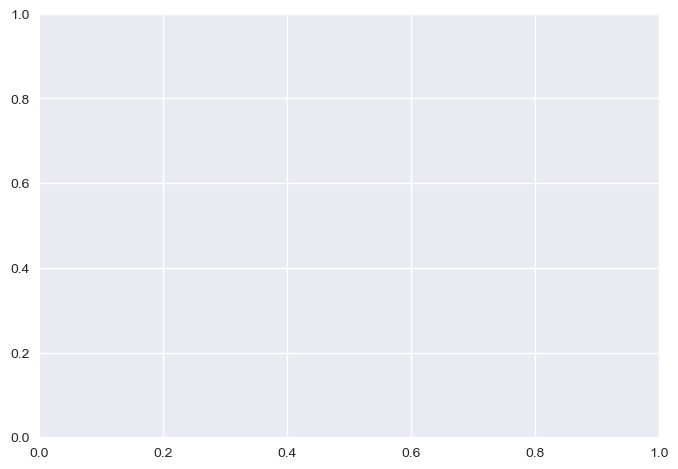

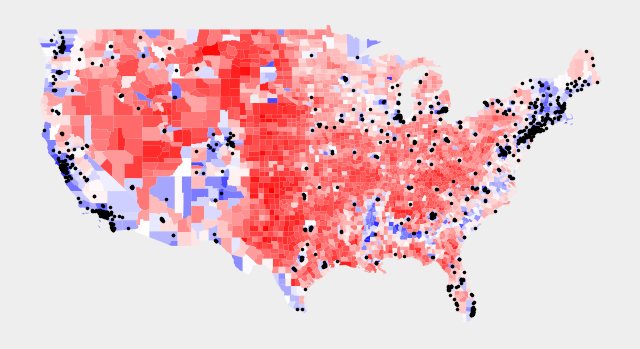

In [26]:
fig,ax = plt.subplots()


fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)

df_dem_lead_merged = df_merged.merge(df_dem_lead,left_on = 'FIPS',right_on = 'county_fips')
df_dem_lead_merged.plot(column = 'DEM_LEAD_NORM',ax = ax,cmap ='bwr_r')
clinic_geo_df.plot(ax = ax,color = 'k',markersize = 5)
plt.savefig("plots/abortion_clinic_locs_v_party.png")

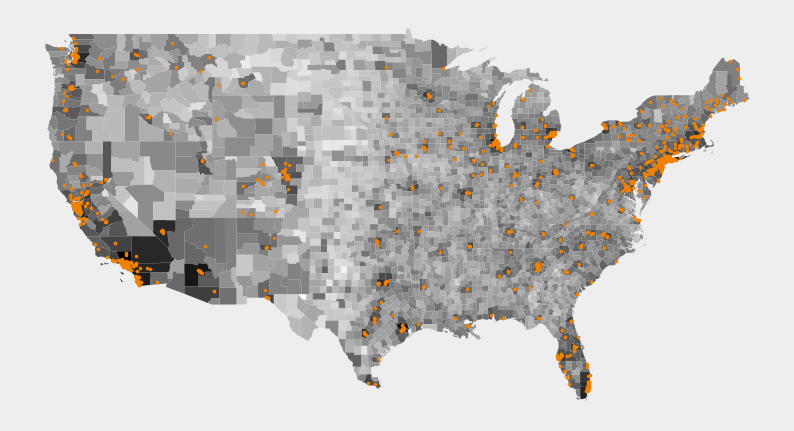

In [27]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged.plot(column = 'log_pop',ax = ax)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.png")

In [8]:
sim_50

NameError: name 'sim_50' is not defined

In [28]:

sim_50 = sim1000df.sample(50)
sim_50['facility_id'] = sim_50['index']
gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim_50)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon,gdf_pop_nearest_fac.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'facility_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=sim_50,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...


AttributeError: 'DataFrame' object has no attribute 'set_crs'

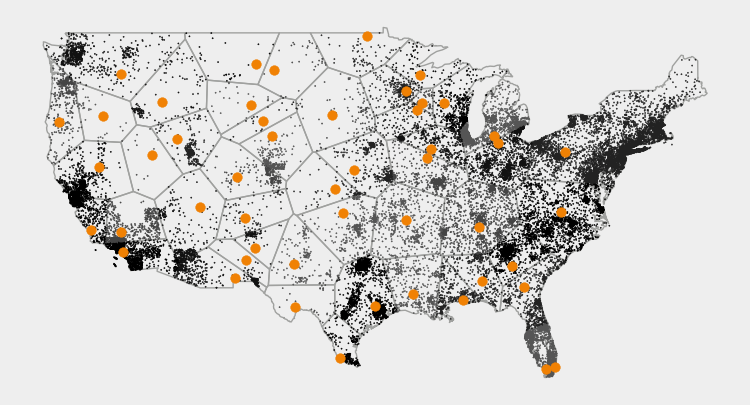

In [109]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


newcolors = ['#000000','#111111','#222222','#444444','#555555']
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
greyscale_pallete = ListedColormap(newcolors, name='OrangeBlue')

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
voronoi_pop_fac_density.set_geometry('geometry_voronoi').to_crs(4326).plot(ax = ax,edgecolor = LINE_COLOR,lw = 1,facecolor="none")

#df_merged.plot(column = 'log_pop',ax = ax)
#clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
#df_merged['log_pop'] =np.log(df_merged['pop_2010'])
gdf_pop_nearest_fac2.plot(ax = ax,column = 'nearest_fac',markersize=0.8,cmap = greyscale_pallete)
sim_50.to_crs(4326).plot(ax = ax,color=DOT_COLOR)
plt.savefig("plots/sim_facility_voronoi_tesselation.png")


### Empirical Voronoi Cell Tesselation

In [96]:

sim_50 = sim1000df.sample(50)
clinic_pop_nearest_fac = calc_facility_distance(gdf_pop,clinic_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
clinic_pop_nearest_fac_2 = gpd.GeoDataFrame(clinic_pop_nearest_fac,geometry = gpd.points_from_xy(clinic_pop_nearest_fac.lon,clinic_pop_nearest_fac.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'facility ID'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
clinic_voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=clinic_geo_df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

changed
calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...
estimating cell population
joining vornoi tesslation to boundary data
print calculating facility and population densities


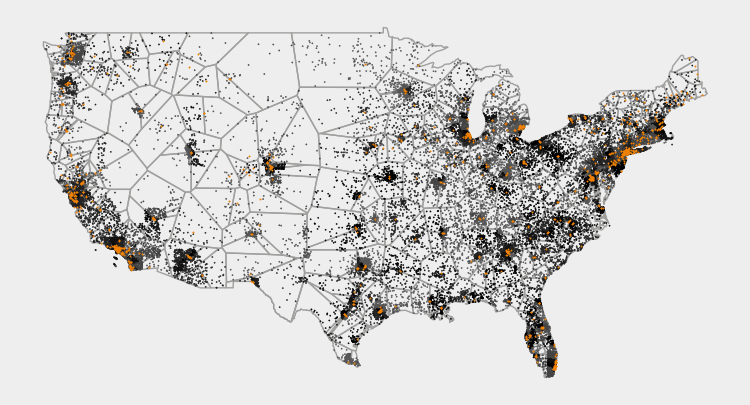

In [110]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


newcolors = ['#000000','#111111','#222222','#444444','#555555']
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
greyscale_pallete = ListedColormap(newcolors, name='OrangeBlue')

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_voronoi_pop_fac_density.set_geometry('geometry_voronoi').to_crs(4326).plot(ax = ax,edgecolor = LINE_COLOR,lw = 1,facecolor="none")

#df_merged.plot(column = 'log_pop',ax = ax)
#clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
#df_merged['log_pop'] =np.log(df_merged['pop_2010'])
clinic_pop_nearest_fac_2.plot(ax = ax,column = 'nearest_fac',markersize=0.8,cmap = greyscale_pallete)
clinic_geo_df.to_crs(4326).plot(ax = ax,color=DOT_COLOR,markersize = 1)
plt.savefig("plots/clinic_facility_voronoi_tesselation.png")
